# kaggle 신용카드 사기 검출 - 오버샘플링, 언더샘플링

In [1]:
# 케글 신용카드 사기 검출 데이터 세트
import numpy as np
import pandas as pd
crd_df = pd.read_csv('C:/Users/gihun/Python_data/data/creditcard.csv')
crd_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [26]:
crd_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [3]:
from sklearn.model_selection import train_test_split
df_copy = crd_df.copy()
df_copy.drop('Time',axis=1, inplace=True)

X = df_copy.iloc[:,:-1]
y = df_copy.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0, stratify=y)

In [4]:
y_train.sum()/len(y_train), y_test.sum()/len(y_test)

(0.001729245759178389, 0.0017204452090867595)

### kaggle 신용카드 사기 검출 데이터세트

* 데이터셋 위치
https://www.kaggle.com/mlg-ulb/creditcardfraud

- 사기(Fraud) 트랜잭션: 1 (전체의 0.172%) 
- 정상 신용카드 트랜잭션: 0
성능평가: ROC-AUC ( 대부분이 정상 거래이고 사기거래 데이터는 소수인 극도로 불균형 데이터세트)

- 데이터셋 다운로드: 
https://www.kaggle.com/mlg-ulb/creditcardfraud?select=creditcard.csv

- 다운로드 후 데이터셋 압축풀기
creditcard.zip -> creditcard.csv


- LogisticRegression, LightGBM으로 예측

## 분석 순서

1. 로지스틱 분류
2. LightGBM 분류
3. 데이터 분포 왜곡 개선 후 모델 각각 재적용 <br>
    1) 정규 분포 형태로 변경 후 모델 각각 재적용<br>
    2) 로그 변환 후 모델 각각 재적용<br>
4. 이상치 데이터 제거 후 모델 각각 재적용
5. SMOTE 오버 샘플링후 모델 각각 재적용

In [5]:
#!pip install imbalanced-learn


In [6]:
# conda install -c conda-forge imbalanced-learn

### 데이터 일차 가공 및 모델 학습/예측/평가

In [5]:
def get_eval_score(y_test, y_pred, y_pred_proba):
    confusion = confusion_matrix(y_test, y_pred)
    acc = accuracy_score(y_test, y_pred) # 정확도
    prec = precision_score(y_test, y_pred) # 정밀도
    recall = recall_score(y_test, y_pred) # 재현율
    f1 = f1_score(y_test, y_pred) # f1점수
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    
    print("-"* 100)
    print("오차행렬:")
    print(confusion)
    print("정확도: {:.4f} 정밀도: {:.4f} 재현율: {:.4f} F1:{:.4f} AUC: {:.4f}".\
          format(acc, prec,recall, f1, roc_auc ))
    return

In [6]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score

def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

# 1. LogisticRegression 모델을 활용한 분류

In [7]:
# 아무것도 안했을 때
from sklearn.linear_model import LogisticRegression
lr_clf = LogisticRegression(solver='lbfgs', max_iter=1000)
lr_clf.fit(X_train, y_train)
get_clf_eval(y_test, lr_clf.predict(X_test),lr_clf.predict_proba(X_test)[:,1])

오차 행렬
[[56853    11]
 [   36    62]]
정확도: 0.9992, 정밀도: 0.8493, 재현율: 0.6327,    F1: 0.7251, AUC:0.9637


# 2. LightGBM 모델 학습 및 평가

In [8]:
from lightgbm import LGBMClassifier
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
lgbm_clf.fit(X_train,y_train)
get_clf_eval(y_test, lgbm_clf.predict(X_test),lgbm_clf.predict_proba(X_test)[:,1])

오차 행렬
[[56860     4]
 [   24    74]]
정확도: 0.9995, 정밀도: 0.9487, 재현율: 0.7551,    F1: 0.8409, AUC:0.9782


# 3.  데이터 분포도 변환 후 모델 재학습/예측/평가


*  왜곡된 분포도를 가지는 데이터를 재가공한뒤 모델 재테스트

<AxesSubplot: xlabel='Amount', ylabel='Count'>

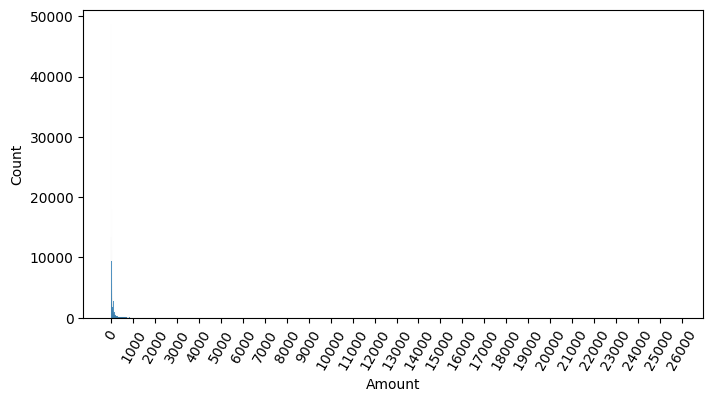

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,4))
plt.xticks(range(0,30000,1000),rotation=60)
sns.histplot(crd_df.Amount)

In [13]:
crd_df.Amount.value_counts().sort_index() # 왜곡된 분포를 가지고 있음

0.00        1825
0.01         718
0.02          85
0.03           3
0.04          11
            ... 
11898.09       1
12910.93       1
18910.00       1
19656.53       1
25691.16       1
Name: Amount, Length: 32767, dtype: int64

* 1. 사이킷런의 StandardScaler를 이용하여 정규분포 형태로 Amount 피처값 변환하는 로직으로 수정. 

In [15]:
from sklearn.preprocessing import StandardScaler
df_copy = crd_df.copy()
scaler = StandardScaler()
new_amount=scaler.fit_transform(df_copy.Amount.values.reshape(-1,1))
df_copy.drop('Time',axis=1,inplace=True)
df_copy['Amount']=new_amount
X = df_copy.iloc[:,:-1]
y = df_copy.iloc[:,-1]
X.shape, y.shape

((284807, 29), (284807,))

*  2. numpy log1p를 사용하여 Amount 피처값을 로그 변환하는 로직으로 수정.
- 로그변환: 데이터 분포도가 심하게 왜곡되어 있을 경우 적용. 
- 원래 값을 log 값으로 변환해 상대적으로 작은 값으로 변경, 데이터 분포의 왜곡을 개선

In [18]:
# Amount를  로그 변환하는 로직으로 수정
df_copy = crd_df.copy()

amount_n = np.log1p(df_copy['Amount'])
# 변환된 Amount를 Amount_Scaled로 피처명 변경후 DataFrame맨 앞 컬럼으로 입력
df_copy.drop('Time',axis=1,inplace=True)
df_copy['Amount']=new_amount

X_features = df_copy.iloc[:, :-1]
y_target = df_copy.iloc[:, -1]

# train_test_split( )으로 학습과 테스트 데이터 분할. stratify=y_target으로 Stratified 기반 분할
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.3, random_state=0, stratify=y_target)

------------------------------------------------------------------------------------------------------

# 4. 이상치(Outlier) 데이터 제거 후 모델 학습/예측/평가

In [25]:
import numpy as np

def get_outlier(df=None, column=None, weight=1.5):
    # fraud에 해당하는 column 데이터만 추출, 1/4 분위와 3/4 분위 지점을 np.percentile로 구함. 
    fraud = df[df['Class']==1][column]
    #print(fraud.index)
    quantile_25 = np.percentile(fraud.values, 25)
    quantile_75 = np.percentile(fraud.values, 75)
    # IQR을 구하고, IQR에 1.5를 곱하여 최대값과 최소값 지점 구함. 
    iqr = quantile_75 - quantile_25
    iqr_weight = iqr * weight
    lowest_val = quantile_25 - iqr_weight
    highest_val = quantile_75 + iqr_weight
    # 최대값 보다 크거나, 최소값 보다 작은 값을 아웃라이어로 설정하고 DataFrame index 반환. 
    outlier_index = fraud[(fraud < lowest_val) | (fraud > highest_val)].index
    return outlier_index

In [27]:
get_outlier(crd_df,'V14',weight=1.5)

Int64Index([8296, 8615, 9035, 9252], dtype='int64')

<AxesSubplot: >

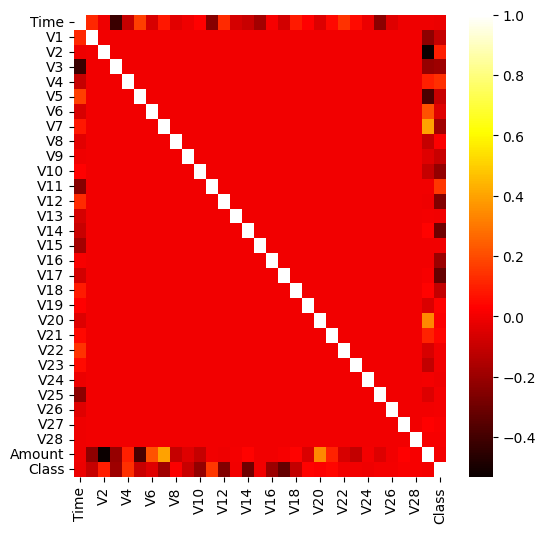

In [21]:
# 이상치 제거하기 전에 어떠한 컬럼의 이상치를 제거할 것인지 해당 컬럼을 확정해야함
# 이를 위해 클래스(레이블)과 상관관계가 높은 컬럼을 확인
import seaborn as sns
plt.figure(figsize=(6,6))
corr = crd_df.corr()
sns.heatmap(corr,cmap='hot')

In [28]:
# 확인한 이상치 인덱스의 레코드를 전체 데이터셋에서 제거함
df_copy = crd_df.copy()
from sklearn.model_selection import train_test_split
df_copy = crd_df.copy()
df_copy.drop('Time',axis=1, inplace=True)
df_copy['Amount']=new_amount
# 이상치 데이터 삭제
outlier_index = get_outlier(df_copy, 'V14')
df_copy.drop(outlier_index, axis=0, inplace=True)
X = df_copy.iloc[:,:-1]
y = df_copy.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0, stratify=y)

In [29]:
get_clf_eval(y_test, lgbm_clf.predict(X_test),lgbm_clf.predict_proba(X_test)[:,1])

오차 행렬
[[56859     4]
 [   14    84]]
정확도: 0.9997, 정밀도: 0.9545, 재현율: 0.8571,    F1: 0.9032, AUC:0.9857


In [31]:
get_clf_eval(y_test, lgbm_clf.predict(X_test),lgbm_clf.predict_proba(X_test)[:,1])

오차 행렬
[[56859     4]
 [   14    84]]
정확도: 0.9997, 정밀도: 0.9545, 재현율: 0.8571,    F1: 0.9032, AUC:0.9857


# 5. SMOTE 오버 샘플링 적용 후 모델 학습/예측/평가

In [34]:
from imblearn.over_sampling import SMOTE

In [35]:
smote = SMOTE(random_state=0)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

In [36]:
print(y_train.value_counts(normalize=True))
print(y_train_over.value_counts(normalize=True))

0    0.998288
1    0.001712
Name: Class, dtype: float64
0    0.5
1    0.5
Name: Class, dtype: float64


In [37]:
# 아무것도 안했을 때
from sklearn.linear_model import LogisticRegression
lr_clf = LogisticRegression(solver='lbfgs', max_iter=1000)
lr_clf.fit(X_train_over, y_train_over)
print(get_clf_eval(y_test, lr_clf.predict(X_test),lr_clf.predict_proba(X_test)[:,1]))
# light
from lightgbm import LGBMClassifier
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
lgbm_clf.fit(X_train_over,y_train_over)
print(get_clf_eval(y_test, lgbm_clf.predict(X_test),lgbm_clf.predict_proba(X_test)[:,1]))

오차 행렬
[[55299  1564]
 [   10    88]]
정확도: 0.9724, 정밀도: 0.0533, 재현율: 0.8980,    F1: 0.1006, AUC:0.9641
None
오차 행렬
[[56853    10]
 [   21    77]]
정확도: 0.9995, 정밀도: 0.8851, 재현율: 0.7857,    F1: 0.8324, AUC:0.9775
None


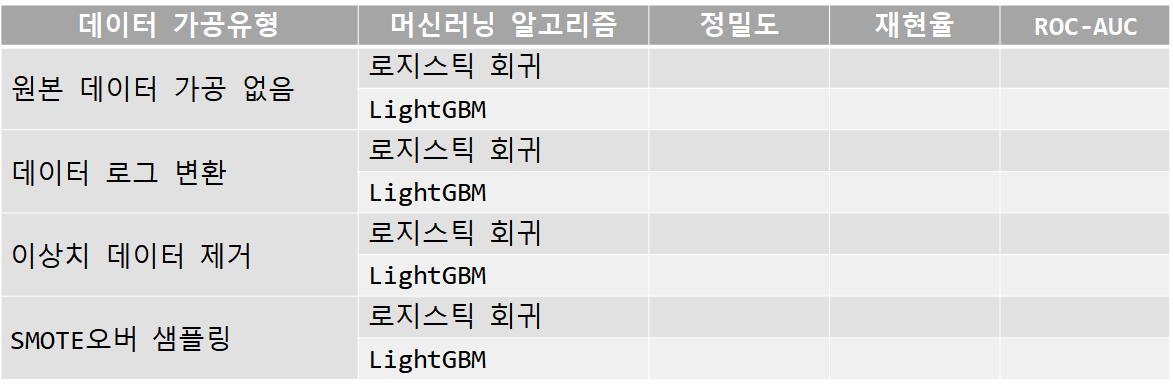